In [78]:
import pandas as pd 
import numpy as np
from pathlib import Path
import unicodedata, re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [79]:


ROOT_DIR = Path("/home/raghav/Desktop/Nepali News Classsification/archive (5)")  

def clean_nepali(text):
    text = unicodedata.normalize("NFC", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

rows = []

for class_dir in ROOT_DIR.iterdir():
    if not class_dir.is_dir():
        continue

    label = class_dir.name   

    for file in class_dir.rglob("*.txt"):
        try:
            text = file.read_text(encoding="utf-8")
        except UnicodeDecodeError:
            text = file.read_text(encoding="utf-8", errors="ignore")

        text = clean_nepali(text)

        if text:
            rows.append({
                "text": text,
                "label": label
            })

df = pd.DataFrame(rows)

print(df.head())
print(df["label"].value_counts())


                                                text    label
0  "राजनका निबन्ध हाङयुगका कविता ""मुलुकमा सशस्त्...  Sahitya
1  समकालीन कविका स्वरनेपाली कविता साहित्यको समकाल...  Sahitya
2  उन्नतिको दोस्रो उपन्यासगीतकार उन्नति बोहरा शिल...  Sahitya
3  पत्रकार पारसले थपे परिचयपत्रकारितासँगै पुस्तक ...  Sahitya
4  बेलायती पत्रकारले देखेको नेपाल"जब उनी विद्यार्...  Sahitya
label
Sahitya            1000
Viswa              1000
Khelkud            1000
Prabas             1000
SuchanaPrabidhi    1000
ArthaBanijya       1000
Swasthya           1000
Bichar             1000
Desh               1000
Manoranjan         1000
Name: count, dtype: int64


In [80]:
df.shape

(10000, 2)

In [81]:
df.head(5)

,text,label
0,"""राजनका निबन्ध हाङयुगका कविता """"मुलुकमा सशस्त्...",Sahitya
1,समकालीन कविका स्वरनेपाली कविता साहित्यको समकाल...,Sahitya
2,उन्नतिको दोस्रो उपन्यासगीतकार उन्नति बोहरा शिल...,Sahitya
3,पत्रकार पारसले थपे परिचयपत्रकारितासँगै पुस्तक ...,Sahitya
4,"बेलायती पत्रकारले देखेको नेपाल""जब उनी विद्यार्...",Sahitya


In [82]:
X=df["text"]
y=df["label"]

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [ ]:
#use label encoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 

In [85]:

pipe = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features=100000),
    LogisticRegression(max_iter=1000) # Added max_iter for convergence
)

pipe.fit(X_train, y_train_enc)
y_preds = pipe.predict(X_test)
print(f'Accuracy={accuracy_score(y_test_enc,y_preds)*100:.3f}')
print(f'Classification Report\n{classification_report(y_test_enc,y_preds)}')

Accuracy=83.450
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       220
           1       0.86      0.90      0.88       196
           2       0.81      0.82      0.81       203
           3       0.99      0.96      0.97       214
           4       0.72      0.69      0.71       199
           5       0.79      0.72      0.75       193
           6       0.69      0.79      0.74       183
           7       0.90      0.84      0.87       192
           8       0.93      0.92      0.92       193
           9       0.83      0.88      0.85       207

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000



In [ ]:
#find average model accuracy



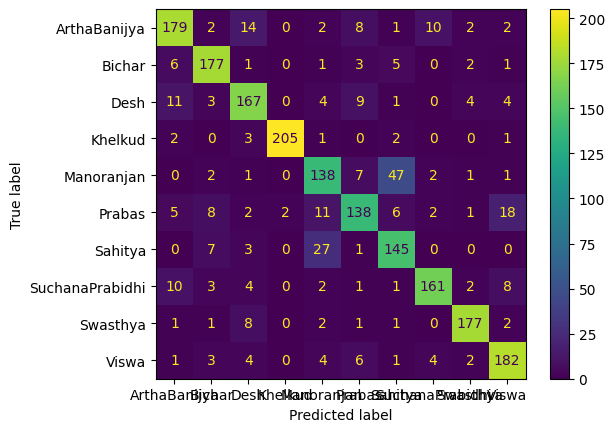

In [86]:
cm=confusion_matrix(y_test_enc,y_preds)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
cm_plot.plot()
plt.savefig('cm.png')
plt.show()

In [89]:
#export the model using joblib
import joblib
joblib.dump(pipe, 'nepali_news_classifier.joblib')
joblib.dump(le, 'nepali_news_label_encoder.joblib')

['nepali_news_label_encoder.joblib']